# Ajustes lineales, no lineales y busqueda de minimos y maximos

## SciPy

* <code>SciPy</code> es una biblioteca libre y de codigo abierto para Python. Se compone de herramientas y algoritmos matematicos. Se creo a partir de la coleccion original de Travis Oliphant, que se componia de modulos de extension para Python y fue lanzada en 1999 bajo el nombre de Multipack, llamada asi por los paquetes netlib que reunian a ODEPACK, QUADPACK, y MINPACK.
* <code>SciPy</code> contiene modulos para optimizacion, algebra lineal, integracion, interpolacion, funciones especiales, FFT, procesamiento de senales y de imagen, resolucion de ODEs y otras tareas para la ciencia e ingenieria.
* <code>SciPy</code> se basa en el objeto de matriz NumPy y es parte del conjunto NumPy, que incluye herramientas como Matplotlib, Pandas y SymPy, y un conjunto en expansion de bibliotecas de computacion cientifica. Este conjunto esta dirigido al mismo tipo de usuarios que los de aplicaciones como Matlab, GNU Octave, y Scilab. A veces tambien se hace referencia a este conjunto de herramientas y bibliotecas como SciPy.

https://www.scipy.org/index.html
https://www.scipy.org/install.html
pip install scipy
sudo pip3 install sympy

### Ajuste de funciones generales - SciPy

Si queremos hacer un ajuste general, no necesariamente polinomico, debemos usar alguno de los metodos del paquete optimize, que contiene varios optimizadores locales y globales. El mas comun es leastsq que, al ser un optimizador, hay que definit previamente una funcion residuo que es la que realmente se va minimizar. Para ello necesitamos el paquete <code>SciPy</code>.

http://webs.ucm.es/info/aocg/python/modulos_cientificos/scipy/index.html

Su organizacion se estructura en subpaquetes, que se pueden considerar especializados en dominios cientificos determinados. Podemos encontrar estos paquetes, segun la ayuda de SciPy:

* linalg - Algebra lineal
* signal - Procesamiento de senales
* stats - Funciones estadisticas
* special - Funciones especiales
* integrate - Integracion
* interpolate - Herramienta de interpolacion
* optimize - Herramienta de optimizacion
* fftpack - Algoritmos de transformada de Fourier
* io - Entrada y salidad de datos
* lib.lapack - Wrappers a la libreria LAPACK
* lib.blas - Wrappers a la libreria BLAS
* lib - Wrappers a librerias externas
* sparse - Matrices sparse
* misc - otras utilidades
* cluster - Vector Quantization / Kmeans
* maxentropy - Ajuste a modelos con maxima entropia

Los subpaquetes de Scipy se tienen que importar de forma separada. Por ejemplo:

```Python
    from scipy import linalg, optimize
    # Tanto Scipy como Numpy tinene versiones de su documentacion en pdf y html en http://docs.scipy.org/. Tambien se puede obtener ayuda de las funciones y de los modulos mediante
    sp.info(funcion)
```

como por ejemplo

```Python
    import scipy as sp        # Importamos el modulo scipy como el alias sp
    sp.info(sp.optimize.fmin) # Consultamos la informacion de la funcion fmin.
```

Otra forma de buscar informacion es con el comando source, que lista el codigo de esa funcion,
```Python
    sp.source(sp.linspace)
```

### Ajuste de una funcion usando <code>scipy.optimize curve_fit

In [1]:
"""
Descripcion: Ejemplo de como usar la funcion curve_fit perteneciente a
scipy.optimize para ajustar una funcion a una curva.
"""
import numpy as np
import matplotlib.pyplot as plt         # Importamos matplotlib.pyplot como el alias plt
from scipy.optimize import curve_fit    # Importamos curve_fit de scipy.optimize
import scipy as sp                      # Importamos scipy como el alias sp

Vamos a recrear el ejemplo anterior, resuelto con <code>NumPy</code> y compraremos los resultados del ajuste.

In [2]:
n = 50                                            # Haremos 50 datos con ruido aleatorio
jitter_amp = 4.0                                  # Esto es la amplitud del ruido
x = np.linspace(0, 10, n)                         # Generamos la variable x
jitter = jitter_amp * (np.random.random(n)-0.5)   # Calculamos el ruido para cada dato
y = x + jitter

Graficamos

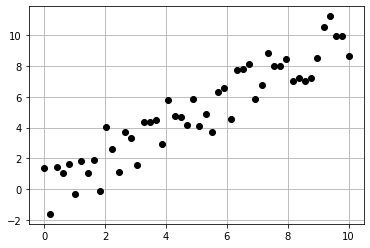

In [3]:
plt.plot(x, y, 'ok')
plt.grid()

Ahora definamos una funcion de ajuste.

Rehagamos el ajuste usando <code>NumPy</code> a los efectos de comparar los coeficientes obtenidos.

In [4]:
a = np.polyfit(x, y, 1)   # el numero 1 significa que usaremos un polinomio de 1er grado
a

array([0.97227915, 0.19950088])

In [5]:
def fit_func(t, m, b):
    return m*t+b

Y utilizamos la funcion <code>optimize.curve_fit</code>

In [6]:
p, cov = curve_fit(fit_func, x, y)
p, a # Observemos que a es el resultado obtenido con anterioridad

(array([0.97227915, 0.1995009 ]), array([0.97227915, 0.19950088]))

Esta es la matriz de covarianza

In [7]:
cov

array([[ 0.00296916, -0.01484579],
       [-0.01484579,  0.09998184]])

Ahora grafiquemos los resultados

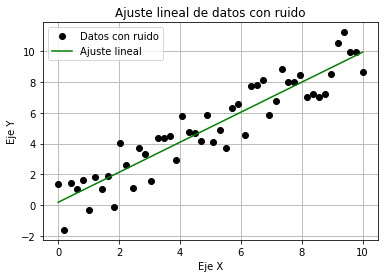

In [8]:
t = np.linspace(0, 10, n)
plt.plot(x, y, 'ok')
plt.plot(t, p[0]*t+p[1], 'g') # Aqui utilizamos los resultados
plt.grid()
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Ajuste lineal de datos con ruido')
plt.legend(['Datos con ruido', 'Ajuste lineal'], loc = 0)

Para no usar datos experimentales reales, definimos una funcion que a partir de unos coeficientes inventados crea un array y al que anadimos un array de numeros aleatorios de la misma dimension que x mediante sp.random.normal que ponderamos con el factor k.

Para este ejemplo imaginaremos un experimento, cuyos resultados en funcion del tiempo, vienen dados por la funcion,

$$experimen = e^{\left(\frac{-bx^{2}}{2d^{2}}\right)}+cx$$

siendo a, b, c y d coeficientes desconocidos que el investigador sabe para mejorar sus publicaciones.

In [9]:
# definimos la funcion
def mi_funcion(x, a, b, c, d):
    return a * np.exp(-b*x**2/(2*d**2)) + c*x

In [10]:
# Anadimos ruido a la funcion
x = np.linspace(0, 5, 30)

a, b, c, d = 2.5, 1.3, 0.5, 1
y = mi_funcion(x, a, b, c, d)

def ruido(x, y, k):
    yn = y + k * np.random.normal(size = len(x))
    return yn
# Aqui `len(x)` nos dice cual es la longitud del vector con los datos, asi generamos otro
# vector con el ruido que le sumamos a los datos medidos (simulados)

Ajustamos nuestros datos experimentales recien creados a la funcion inicial mediante curve_fit. Los resultados los vamos a almacenar en coeficientes_optimizados y covarianza_estimada que es la covarianza de los coeficientes optimizados.

In [11]:
# Ajustamos los datos experimentales a nuestra funcion y los almacenamos
coeficientes_optimizados, covarianza_estimada = curve_fit(mi_funcion, x, y)

Por ultimo presentamos en pantalla.

In [12]:
# Mostramos los coeficientes calculados
# y = mi_funcion(x, 2.5, 1.3, 0.5, 1)
print('Coeficientes optimizados: ', coeficientes_optimizados)
print('Covarianza estimada: ', covarianza_estimada)

Coeficientes optimizados:  [  2.5        247.41839953   0.5         13.79571839]
Covarianza estimada:  [[ 4.64400139e-33 -7.38475982e-24  1.12388366e-34 -2.05882173e-25]
 [-7.38475977e-24  1.79244753e-13 -2.04248019e-24  4.99722364e-15]
 [ 1.12388368e-34 -2.04248019e-24  8.91983057e-35 -5.69429805e-26]
 [-2.05882170e-25  4.99722364e-15 -5.69429820e-26  1.39319247e-16]]


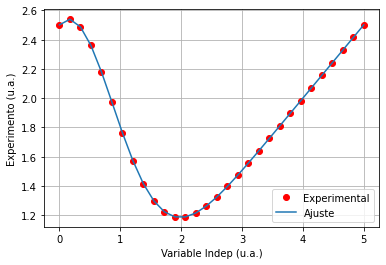

In [13]:
# Creamos la figura
plt.figure()

# Dibujamos los datos experimentales.
plt.plot(x, y, 'ro', label = 'Experimental')

# Dibujamos
plt.plot(x, mi_funcion(x, coeficientes_optimizados[0], coeficientes_optimizados[1], coeficientes_optimizados[2], coeficientes_optimizados[3]), label = 'Ajuste')

# Anadimos la leyenda
plt.legend()

plt.xlabel('Variable Indep (u.a.)')
plt.ylabel('Experimento (u.a.)')
plt.grid()
plt.show()

### Ajuste por cuadrados minimos usando scipy.optimize leastsq

In [14]:
from scipy.optimize import leastsq

datos_y = np.array([2.9, 6.1, 10.9, 12.8, 19.2])
datos_x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])

In [15]:
# Funcion para calcular los residuos, donde se calcula (datos - modelo)
def residuos(p, y, x):
    error = y - (p[0]*x + p[1])
    return error

In [16]:
# Parametros iniciales estimados
# y = p0[0]*x + p0[0]
p0 = [2.0, 0.0]

In [17]:
# Hacemos el ajuste por minimos cuadrados con leastsq(). El primer parametro
# es la funcion de residuos, luego los parametro iniciales y una tupla con los
# argumentos de la funcion de residuos, en este caso, datos_y y datos_x en
# ese orden, porque asi se definio la funcion de error
ajuste = leastsq(residuos, p0, args=(datos_y, datos_x))

In [18]:
# El resultado es una lista, cuyo primer elemento es otra
# lista con los parametros del ajuste
print(ajuste[0])
print(ajuste[0][0])

[ 3.93 -1.41]
3.9300000000042097


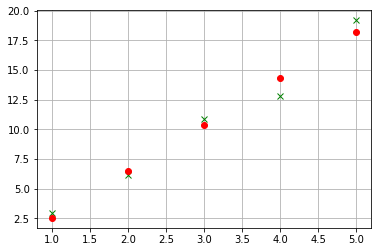

In [19]:
plt.plot(datos_x, datos_y, 'xg', label = 'Datos de laboratorio')
yres = ajuste[0][0] * datos_x + ajuste[0][1]
plt.plot(datos_x, yres, 'or', label = 'Datos ajustados')
plt.grid()

Veamos otro ejemplo para ajustar una funcion seno:

In [20]:
from scipy import random

In [21]:
# Generamos unos datos artificiales para hacer el ejemplo
# A datos_y se le anade "ruido" que simula error de
# medida, anadiendole un valor aleatorio
datos_x = np.arange(0, 0.1, 0.003)
A, k, theta = 10.0, 33.3, np.pi/5.0 # Definimos tres datos
y_real = A * np.sin(2 * np.pi * k * datos_x + theta)  # Calculamos y
datos_y = y_real + 2 * random.randn(len(datos_x))  # Les metemos ruido para que parezcan reales

In [22]:
# Ahora se trata de ajustar estos datos a una funcion
# modelo tipo senoidal A * sin(2*pi*k*x + theta)

# Defino la funcion de residuos
def residuos(p, y, x):
    A, k, theta = p
    error = y - A * np.sin(2 * np.pi * k * x + theta)
    return error

In [23]:
# Parametros iniciales
# y = p[0]*np.sin(2*np.pi*p[1]*x + p[2])
# Si estos se alejan mucho del valor real
# la solucion no convergera
p0 = [8.0, 40.0, np.pi/3]

In [24]:
# hacemos el ajuste por minimos cuadrados
ajuste = leastsq(residuos, p0, args=(datos_y, datos_x))

# El resultado es una lista, cuyo primer elemento es otra
# lista con los parametros del ajuste.
print(ajuste[0])

[-9.62763673 33.03131775 -2.38160294]


In [25]:
# Defino la funcion modelo, para representarla graficamente
def funcion(x, p):
    return p[0] * np.sin(2 * np.pi * p[1] * x + p[2])

In [26]:
# genero datos a partir del modelo para representarlo
x1 = np.arange(0, datos_x.max(), 0.001)  # array con muchos puntos de x
y1 = funcion(x1, ajuste[0])   # valor de la funcion modelo en los x

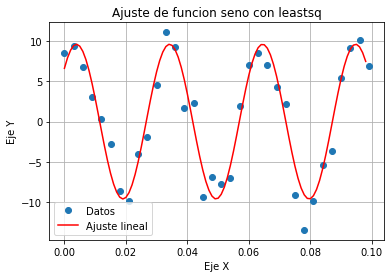

In [27]:
# Ahora muestro los datos y el ajuste graficamente
plt.plot(datos_x, datos_y, 'o') # datos

plt.plot(x1, y1, 'r-')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Ajuste de funcion seno con leastsq')
plt.legend(('Datos', 'Ajuste lineal'))
plt.grid()
plt.show()

Este ejemplo es bastante elaborado porque hemos usado un optimizador general para hacer un ajuste, pero podemos usar curve_fit() para ahorrarnos la funcion residuo.

La anterior es una manera artesanal de hacer el ajuste, al construir la funcion de error. Para un ajuste de datos.

## Busqueda de minimos de una funcion

En <code>scipy</code> las funciones universales (suma, resta, division, etc.) se han alterado para no producir errores de coma flotante cuando se encuentran errores; por ejemplo se devuelve NaN e Inf en los arrays en lugar de errores. Para ayudar a la deteccion de estos eventos, hay disponibles varias funciones como sp.isnan, sp.isinfinite, sp.isinf. Ademas se han modificado algunas funciones (log, sqrt, funciones trigonometricas inversas) para devolver valores complejos en lugar de NaN (por ejemplo sp.sqrt(-1) devuelve 1j).

Dada la gran cantidad de modulos contenidos en Scipy, en esta seccion nos limitaremos en dar ejemplos de algunos de ellos recordando que el camino ideal para el aprendizaje es la lectura de los manuales oficiales.

### fmin de scipy.optimize

Minimiza una funcion usando el algoritmo downx simplex.

Este algoritmo solo usa valores de funcion, no derivados o segundas derivadas.

A continuacion cargaremos los modulos que vamos a necesitar,

In [28]:
from scipy.optimize import fmin # Importamos fmin de scipy.optimize

Definimos el sistema fisico de unidades y la funcion sinc(x) en python.

In [29]:
# Definimos el sistema fisico de unidades
um = 1         # micras
mm = 100 * um  # milimetros

# Definimos los parametros fisicos
anchura_rendija = 40
longitud_onda = 0.630 * um

# Definimos la funcion "sinc"
def sinc(x):
    # Definimos la funcion sinc normalizada.
    funcion_sinc = (np.sin(np.pi * anchura_rendija * np.sin(x)/longitud_onda)/(np.pi * anchura_rendija * np.sin(x)/longitud_onda))**2
    return funcion_sinc   # La devolvemos.

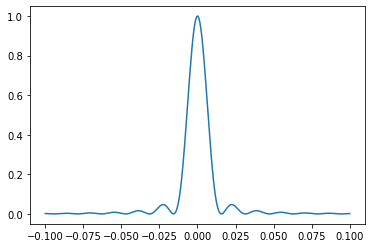

In [30]:
# Podemos representar simplemente creando los arrays dimensionales y cargando matplotlib
x = np.linspace(-0.1, 0.1, 300)
y = sinc(x)

# Creamos la figura
plt.figure()

# Representamos la grafica
plt.plot(x, y)

plt.show()

la funcion fmin necesita de valores iniciales a modo de semilla para comenzar las iteraciones. En nuestro caso hemos elegido como valor 0.001,

In [31]:
# fmin necesita una semillla asi que se la proporcionamos.
semilla = 0.251

calculamos el valor del minimo mediante fmin,

In [32]:
x_minimo_intensidad = fmin(sinc, semilla)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 19


In [33]:
print(x_minimo_intensidad)

[0.23854805]


y por ultimo presentamos en pantalla el resultado mediante un print.
Como podemos observar, tomamos directamente el valor calculado para el print. Esto lo conseguimos gracias al simbolo %.
La utilizacion es sencilla, en el lugar donde queramos que aparezca el valor de nuestra variable escribimos el simbolo % seguido del numero de digitos que queramos que tenga la parte real y por ultimo el tipo de numero que queremos mostrar.
En nuestro caso %1.2f signigica un digito real, dos decimales y el tipo float.
Ademas fuera de las comillas del print debemos de poner otro % y entre parentesis la variable a la que llamamos (en nuestro caso x_minimo_intensidad y sinc (x_minimo_intensidad).

In [34]:
# Presenta en pantalla el minimo y el valor de lal funcion en ese punto
print('El valor de x en el que se encuentra el minimo es %1.2f que corresponde a y = %1.2f'\
     %(x_minimo_intensidad, sinc (x_minimo_intensidad)))

El valor de x en el que se encuentra el minimo es 0.24 que corresponde a y = 0.00


El valor de x en el que se encuentra el minimo es 0.03 que se corresponde a y = 0.0

In [35]:
# Podemos representar simplemente creando los arrays dimensionales y cargando matplotlib
# x = linspace(-1.0, 200)
# y = sinc(x)

# Creamos la figura
plt.figure()

# Reprensetamos junto a la gritica anterior la semilla (en verde) y los minimos (en rango) encontramos (semilla, sinc(semilla), gd)
x_minimo_intensidad, sinc(x_minimo_intensidad)

(array([0.23854805]), array([3.1651888e-08]))

<Figure size 432x288 with 0 Axes>

El valor x en el que se encuentra el minimo es 0.03 qie se corresponde a y = 0.000

TypeError: axis() takes 0 or 1 positional arguments but 6 were given

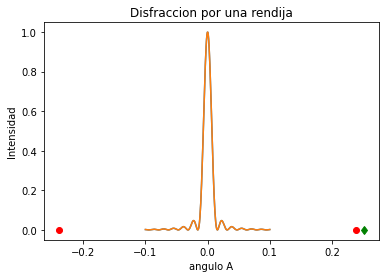

In [36]:
# Podemos representar simplemente creando los arrays dimensionales y cargando matplotlib
# x = linspace -0.1, 0.1, 1300)
# y = sinc(x)

# Creamos la figura
plt.figure()

# Representamos la grafica
plt.plot(x, y)

# Representamos junto a la grafica anterior la semilla (en verde) y los minimos (en rojo) encontrados.
plt.plot(x, y)

# Representamos junto a la grafica simplemente creando los arrays dimensionales y cargando matplotlib
# plt.plot(semilla, sinc, semilla, 'gd')
# plt.plot(x_minimo_intensidad, sinc(x_minimo_intensidad), 'ro')
# plt.plot(x_minimo_intensidad, sinc(x_minimo_intensidad), 'ro')

plt.plot(semilla, sinc(semilla), 'gd',
                x_minimo_intensidad, sinc(x_minimo_intensidad), 'ro',
                -x_minimo_intensidad, sinc(x_minimo_intensidad), 'ro')
    
## Anadimos etiquetas
plt.xlabel('angulo A')
plt.ylabel('Intensidad')
plt.title('Disfraccion por una rendija')
plt.axis(-0, 1, 0, 1, 0, 11)
plt.legend()
plt.show();
